In [1]:
import re
import numpy as np
import json
#Read Text Captions
def readTextFile(path):
    with open(path) as f:
        captions=f.read()
    return captions

In [2]:
captions=readTextFile("./Flickr_Data/Flickr_TextData/Flickr8k.token.txt")
captions=captions.split("\n")[:-1]

In [3]:
len(captions)

40460

In [4]:
first,second=captions[0].split('\t')
print(first.split("."))
print(second)

['1000268201_693b08cb0e', 'jpg#0']
A child in a pink dress is climbing up a set of stairs in an entry way .


In [5]:
#Dictionary to map each image with the list of captions it has

descriptions={}

for x in captions:
    first,second=x.split('\t')
    img_name=first.split(".")[0]
    
    
    #if the image id is already present or not
    
    if descriptions.get(img_name) is None:
        descriptions[img_name]=[]
    descriptions[img_name].append(second)
    
    

In [6]:
descriptions["1000268201_693b08cb0e"]

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [7]:
IMG_PATH="Flickr_Data/Images/"
import cv2
import matplotlib.pyplot as plt
img =cv2.imread(IMG_PATH+"1000268201_693b08cb0e.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
##Data Cleaning

In [9]:
def clean_text(sentence):
    sentence=sentence.lower()
    sentence=re.sub("[^a-z]+"," ",sentence)
    sentence=sentence.split()
    sentence=[s for s in sentence if len(s)>1]
    sentence=" ".join(sentence)
    return sentence

In [10]:
clean_text("A cat is sitting over the house # 65")

'cat is sitting over the house'

In [11]:
#Clean all Captions

for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i]=clean_text(caption_list[i])

In [12]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [13]:
#Write the data to text file

with open("descriptions.txt","w") as f:
    f.write(str(descriptions))

In [14]:
#Vocabulary

In [15]:
descriptions=None
with open("descriptions.txt","r") as f:
    descriptions=f.read()

json_acceptable_string=descriptions.replace("'","\"")
descriptions=json.loads(json_acceptable_string)

In [16]:
print(type(descriptions))

<class 'dict'>


In [17]:
#vocabb


In [18]:
vocab=set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]]
print("vocab Size : %d"%len(vocab))

vocab Size : 8424


In [19]:
#Total Number of Words across all the sentences 
total_words=[]
for key in descriptions.keys():
    [total_words.append(i) for des in descriptions[key] for i in des.split()]
print("Total Words %d"%len(total_words))

Total Words 373837


In [20]:
#Filter words from the vocab according to certain thresold frequency(>10)

import collections
counter=collections.Counter(total_words)
freq_cnt=dict(counter)
print(freq_cnt)

{'child': 1545, 'in': 18987, 'pink': 739, 'dress': 348, 'is': 9345, 'climbing': 507, 'up': 1302, 'set': 109, 'of': 6723, 'stairs': 109, 'an': 2432, 'entry': 1, 'way': 53, 'girl': 3328, 'going': 149, 'into': 1074, 'wooden': 284, 'building': 511, 'little': 1768, 'playhouse': 6, 'the': 18420, 'to': 3176, 'her': 1178, 'cabin': 4, 'black': 3848, 'dog': 8138, 'and': 8863, 'spotted': 38, 'are': 3505, 'fighting': 133, 'tri': 14, 'colored': 221, 'playing': 2008, 'with': 7765, 'each': 430, 'other': 773, 'on': 10746, 'road': 398, 'white': 3959, 'brown': 2578, 'spots': 29, 'staring': 57, 'at': 2916, 'street': 944, 'two': 5643, 'dogs': 2125, 'different': 46, 'breeds': 5, 'looking': 744, 'pavement': 48, 'moving': 41, 'toward': 146, 'covered': 372, 'paint': 62, 'sits': 577, 'front': 1386, 'painted': 64, 'rainbow': 22, 'hands': 246, 'bowl': 30, 'sitting': 1368, 'large': 1237, 'small': 1278, 'grass': 1622, 'plays': 526, 'fingerpaints': 3, 'canvas': 6, 'it': 401, 'there': 304, 'pigtails': 14, 'painting'

In [21]:
#Sort this dictionary according to the freq count

sorted_freq_cnt=sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])

#Filter
threshold=10
sorted_freq_cnt=[x for x in sorted_freq_cnt if x[1]>threshold]
total_words=[x[0] for x in sorted_freq_cnt]

In [22]:
total_words

['in',
 'the',
 'on',
 'is',
 'and',
 'dog',
 'with',
 'man',
 'of',
 'two',
 'white',
 'black',
 'boy',
 'are',
 'woman',
 'girl',
 'to',
 'wearing',
 'at',
 'people',
 'water',
 'red',
 'young',
 'brown',
 'an',
 'his',
 'blue',
 'dogs',
 'running',
 'through',
 'playing',
 'while',
 'shirt',
 'down',
 'standing',
 'ball',
 'little',
 'grass',
 'snow',
 'child',
 'person',
 'jumping',
 'over',
 'three',
 'front',
 'sitting',
 'holding',
 'up',
 'field',
 'small',
 'by',
 'large',
 'green',
 'one',
 'group',
 'yellow',
 'her',
 'walking',
 'children',
 'men',
 'into',
 'air',
 'beach',
 'near',
 'mouth',
 'jumps',
 'another',
 'for',
 'street',
 'runs',
 'its',
 'from',
 'riding',
 'stands',
 'as',
 'bike',
 'girls',
 'outside',
 'other',
 'off',
 'out',
 'rock',
 'next',
 'play',
 'orange',
 'looking',
 'pink',
 'player',
 'camera',
 'their',
 'pool',
 'hat',
 'jacket',
 'boys',
 'women',
 'around',
 'behind',
 'some',
 'background',
 'dirt',
 'toy',
 'soccer',
 'sits',
 'dressed',
 

In [23]:
train_file_data=readTextFile("Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test_file_data=readTextFile("Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")

In [24]:
print(train_file_data)

2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
3197891333_b1b0fd1702.jpg
3119887967_271a097464.jpg
2276499757_b44dc6f8ce.jpg
2506892928_7e79bec613.jpg
2187222896_c206d63396.jpg
2826769554_85c90864c9.jpg
3097196395_ec06075389.jpg
3603116579_4a28a932e2.jpg
3339263085_6db9fd0981.jpg
2532262109_87429a2cae.jpg
2076906555_c20dc082db.jpg
2502007071_82a8c639cf.jpg
3113769557_9edbb8275c.jpg
3325974730_3ee192e4ff.jpg
1655781989_b15ab4cbff.jpg
1662261486_db967930de.jpg
2410562803_56ec09f41c.jpg
2469498117_b4543e1460.jpg
69710415_5c2bfb1058.jpg
3414734842_beb543f400.jpg
3006217970_90b42e6b27.jpg
2192411521_9c7e488c5e.jpg
3535879138_9281d

In [25]:
train=[row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
test=[row.split(".")[0] for row in test_file_data.split("\n")[:-1]]


In [26]:
train[:5]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [27]:
#Prepare Descriptions for the Training Data
#Tweak -Add <s> and <e> token to our training data.

train_descriptions={}

for img_id in train:
    train_descriptions[img_id]=[]
    for cap in descriptions[img_id]:
        cap_to_append="startseq "+ cap + " endseq"
        train_descriptions[img_id].append(cap_to_append)

In [28]:
train_descriptions["2513260012_03d33305cf"]

['startseq black dog is running after white dog in the snow endseq',
 'startseq black dog chasing brown dog through snow endseq',
 'startseq two dogs chase each other across the snowy ground endseq',
 'startseq two dogs play together in the snow endseq',
 'startseq two dogs running through low lying body of water endseq']

In [29]:
#Transfer Learning 
# Images->Features
# Tect->Features


In [30]:
#Step 1- Image Features Extraction

In [31]:
from keras.applications.resnet50 import ResNet50, preprocess_input
model=ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

Using TensorFlow backend.


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [32]:
model.layers[-2].output

<tf.Tensor 'avg_pool/Mean:0' shape=(None, 2048) dtype=float32>

In [33]:
from keras.models import Model,load_model
from keras.preprocessing import image
model_new=Model(model.input,model.layers[-2].output)


In [34]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img =image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    
    #Normalization
    
    
    img=preprocess_input(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


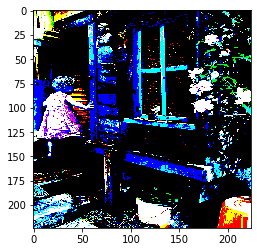

In [35]:
img=preprocess_img(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])

In [36]:
def encode_image(img):
    img =preprocess_img(img)
    feature_vector =model_new.predict(img)
    
    feature_vector=feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector

In [37]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

array([0.04154469, 0.17075907, 0.29276803, ..., 0.05094024, 0.3131962 ,
       0.8600729 ], dtype=float32)

In [38]:
import time
start=time()
encoding_train={}
#image_id-->feature_vector extracted from ResNet Image

for ix,img_id in enumerate(train):
    img_path=IMG_PATH+"/"+img_id+".jpg"
    encoding_train[img_id]=encode_image(img_path)
    
    if ix%100==0:
        print("Encoding in progress Time Step %d"%ix)
end_t=time()

print("Total Time Taken:",end_t-start)

TypeError: 'module' object is not callable

In [ ]:
#Store everthing to the disk
import pickle
with open("encoded_train_features.pkl","wb") as f:
    pickle.dump(encoding_train,f)

In [ ]:
import time
#start=time()
encoding_test={}
#image_id-->feature_vector extracted from ResNet Image

for ix,img_id in enumerate(test):
    img_path=IMG_PATH+"/"+img_id+".jpg"
    encoding_test[img_id]=encode_image(img_path)
    
    if ix%100==0:
        print("Test Encoding in progress Time Step %d"%ix)
end_t=time()

print("Total Time Taken(Test):",end_t-start)

In [ ]:
with open("encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_test,f)

In [ ]:
#Data Pre-processing for captions

len(total_words)

In [ ]:
word_to_idx={}
idx_to_word={}
for i,word in enumerate(total_words):
    word_to_idx[word]=i+1
    idx_to_word[i+1]=word

In [ ]:
word_to_idx["cat"]


In [ ]:
idx_to_word[585]

In [ ]:
#Two special word start and last

print(len(idx_to_word))

In [ ]:
idx_to_word[1846]='startseq'
word_to_idx['startseq']=1846

idx_to_word[1847]='endseq'
word_to_idx['endseq']=1847

vocab_size=len(idx_to_word) +1
print("Voacb Size:",vocab_size)


In [ ]:
max_len=0

for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len=max(max_len,len(cap.split()))
print(max_len)
        

In [ ]:
#Data Loader(Generator)

def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2,y=[],[],[]
    
    n=0
    while True:
        for key,desc_list in train_descriptions.items():
            n+=1
            
            photo=encoding_train[key+".jpg"]
            
            for desc in desc_list:
                seq=[word_to_idx[word] for word in desc.split() if word in word_to_idx]
                
                for i in range(1,len(seq)):
                    xi=seq[0:i]
                    yi=seq[i]
                    
                    
                    #) denotes padding word
                    xi=pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0]
                    yi=to_categocial([yi],num_classes=vocab_size)[0]
                    
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                    
                if n==batch_size:
                    yield [[np.array(X1),np.array(X2)],np.array(y)]
                    
                    X1,X2,y=[],[],[]
                    n=0
                    
    

In [ ]:
#Word Embeddings
f=open("Flickr_Data/glove.6B.50d.txt",encoding='utf8')

In [ ]:
embedding_index={}

for line in f:
    values=line.split()
    
    
    word=values[0]
    word_embedding=np.array(values[1:],dtype='float')
    embedding_index[word]=word_embedding

In [ ]:
f.close()

In [ ]:
embedding_index['apple']

In [ ]:
def get_embedding_matrix():
    emb_dim=50
    
    matrix=np.zeros((vocab_size,emb_dim))
    
    for word,idx in word_to_idx.items():
        embedding_vector=embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx]=embedding_vector
    return matrix

In [ ]:
embedding_matrix=get_embedding_matrix()
embedding_matrix.shape

In [ ]:
embedding_matrix[1843]

In [ ]:
#Model Architecture
from keras import Input
from keras. layers import Dropout,Dense
input_img_features=Input(shape=(2048,))

inp_img1=Dropout(0.3)(input_img_features)
inp_img2=Dense(256,activation='relu')(inp_img1)

In [ ]:
from keras. layers import Embedding,LSTM
input_captions=Input(shape=(max_len,))

inp_cap1=Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)

inp_cap2=Dropout(0.3)(inp_cap1)
inp_cap3=LSTM(256)(inp_cap2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.layers import add

decoder1=add([inp_img2,inp_cap3])
decoder2=Dense(256,activation='relu')(decoder1)

outputs=Dense(vocab_size,activation='softmax')(decoder2)

#Combines Model

model=Model(inputs=[input_img_features,input_captions],outputs=outputs)


In [ ]:
model.summary()

In [ ]:
#Important thing 
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable=False

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

In [ ]:
#Training of Model 

epochs=20
number_pics_per_batch=3
steps=len(train_descriptions)//number_pics_per_batch

In [ ]:
def train():
    
    for i in range(epochs):
        generator=data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        model.save('Flickr_Data/model_weights'+str(i)+'.h5')
        

In [ ]:
model=load_model("Flickr_Data/model_weights/model_9.h5")

In [ ]:
#Prediction
from keras.preprocessing.sequence import pad_sequences
def predict_captions(photo):
    in_text="startseq"
    for i in range(max_len):
        
        sequence=[word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        
        sequence=pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred=model.predict([photo,sequence])
        
        ypred=ypred.argmax() #Word with max Probability always--Greedy Sampling
        
        word=idx_to_word[ypred]
        
        in_text+=(' '+word)
        
        if word=='endseq':
            break
    final_caption=in_text.split()[1:-1]
    
    final_caption=' '.join(final_caption)
    
    return final_caption

In [ ]:
#Pick some random images and See Results


for i in range(1):
    idx=np.random.randint(0,1000)
    all_img_names=list(encoding_test.keys())
    img_name=all_img_names[idx]
    
    photo_2048=encoding_test[img_name].reshape((1,2048))
    
    i=plt.imread("Flickr_Data/Images/"+img_name+".jpg")
    caption=predict_captions(photo_2048)
    print(caption)
    plt.imshow(i)
    plt.show()